In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plotting style
sns.set(style="whitegrid")
%matplotlib inline  


# Load the datasets
umsatz_df = pd.read_csv('0_DataPreparation/umsatzdaten_gekuerzt.csv')
kiwo_df = pd.read_csv('0_DataPreparation/kiwo.csv')
wetter_df = pd.read_csv('0_DataPreparation/wetter.csv')

# Show their shapes to confirm loading
print("umsatz:", umsatz_df.shape)
print("kiwo:", kiwo_df.shape)
print("wetter:", wetter_df.shape)

# Optionally preview
umsatz_df.head()
#kiwo_df.head()
#wetter_df.head()



umsatz: (9334, 4)
kiwo: (72, 2)
wetter: (2601, 5)


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


In [26]:
# Convert Datum to datetime
umsatz_df['Datum'] = pd.to_datetime(umsatz_df['Datum'])
kiwo_df['Datum'] = pd.to_datetime(kiwo_df['Datum'])
wetter_df['Datum'] = pd.to_datetime(wetter_df['Datum'])


In [27]:
#Merge these data on the datum column
merged_df = umsatz_df.merge(kiwo_df, on='Datum' , how='inner' ) \
                     .merge(wetter_df, on='Datum', how='inner')

print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()


Merged DataFrame shape: (223, 9)


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1406211,2014-06-21,1,162.410673,1,6.0,15.5125,18,61.0
1,1406221,2014-06-22,1,99.627613,1,5.0,15.7000,19,NaN
2,1406231,2014-06-23,1,130.997405,1,4.0,16.5000,17,NaN
3,1406241,2014-06-24,1,119.068456,1,7.0,14.3625,7,21.0
4,1406251,2014-06-25,1,114.248640,1,0.0,18.4375,10,NaN


In [28]:

print("Descriptive Statistics:")
merged_df.describe()


Descriptive Statistics:


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
count,2.230000e+02,223,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,165.000000
mean,1.606675e+06,2016-06-23 15:23:24.484304896,2.991031,260.559219,1.0,4.910314,18.418161,11.515695,48.575758
min,1.406211e+06,2014-06-21 00:00:00,1.000000,46.452105,1.0,0.000000,11.562500,5.000000,0.000000
25%,1.506222e+06,2015-06-22 00:00:00,2.000000,127.937248,1.0,4.000000,16.500000,8.000000,21.000000
50%,1.606223e+06,2016-06-22 00:00:00,3.000000,213.304835,1.0,5.000000,18.000000,10.000000,61.000000
75%,1.706234e+06,2017-06-23 00:00:00,4.000000,368.270772,1.0,7.000000,20.125000,14.000000,61.000000
max,1.806245e+06,2018-06-24 00:00:00,5.000000,861.858617,1.0,8.000000,27.875000,20.000000,95.000000
std,1.421961e+05,NaN,1.420541,177.014984,0.0,2.066688,3.266123,3.986291,30.539888


In [29]:
# Overview of all variables
print("Umsatz DataFrame Summary:")
print(umsatz_df.describe())

print("\nKiwo DataFrame Summary:")
print(kiwo_df.describe())

print("\nWetter DataFrame Summary:")
print(wetter_df.describe())


Umsatz DataFrame Summary:
                 id                          Datum  Warengruppe       Umsatz
count  9.334000e+03                           9334  9334.000000  9334.000000
mean   1.559311e+06  2016-01-13 23:56:27.100921344     3.088172   206.749044
min    1.307011e+06            2013-07-01 00:00:00     1.000000     7.051201
25%    1.410123e+06            2014-10-12 00:00:00     2.000000    96.897441
50%    1.601102e+06            2016-01-10 00:00:00     3.000000   161.900831
75%    1.704223e+06            2017-04-22 00:00:00     4.000000   280.644663
max    1.807315e+06            2018-07-31 00:00:00     6.000000  1879.461831
std    1.512503e+05                            NaN     1.489002   144.545189

Kiwo DataFrame Summary:
                     Datum  KielerWoche
count                   72         72.0
mean   2015-12-23 00:00:00          1.0
min    2012-06-16 00:00:00          1.0
25%    2014-03-24 00:00:00          1.0
50%    2015-12-23 00:00:00          1.0
75%    2017-09-2

In [30]:
umsatz_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           9334 non-null   int64         
 1   Datum        9334 non-null   datetime64[ns]
 2   Warengruppe  9334 non-null   int64         
 3   Umsatz       9334 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 291.8 KB


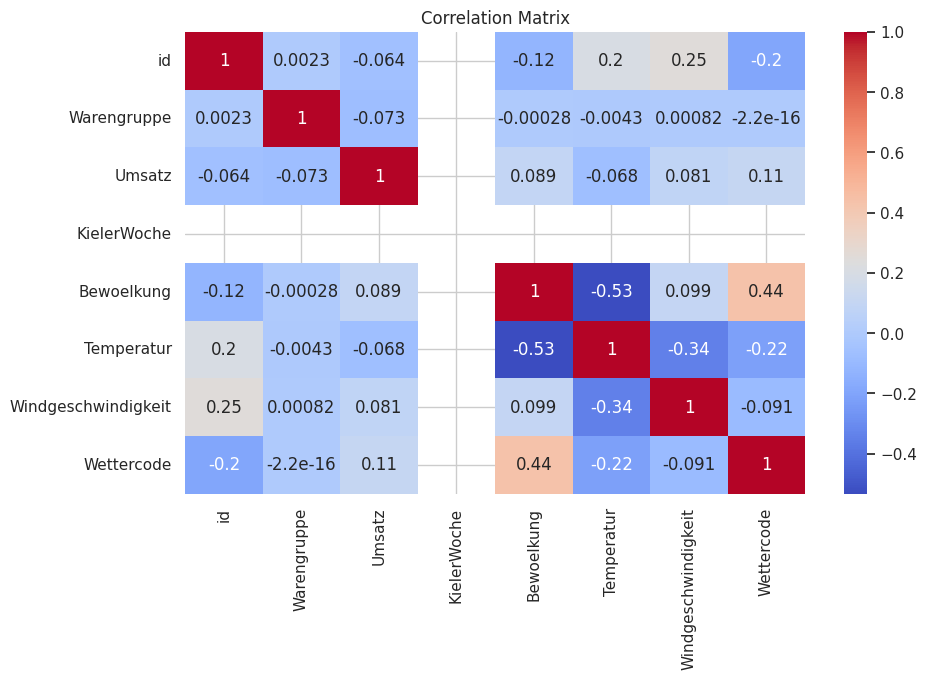

In [31]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


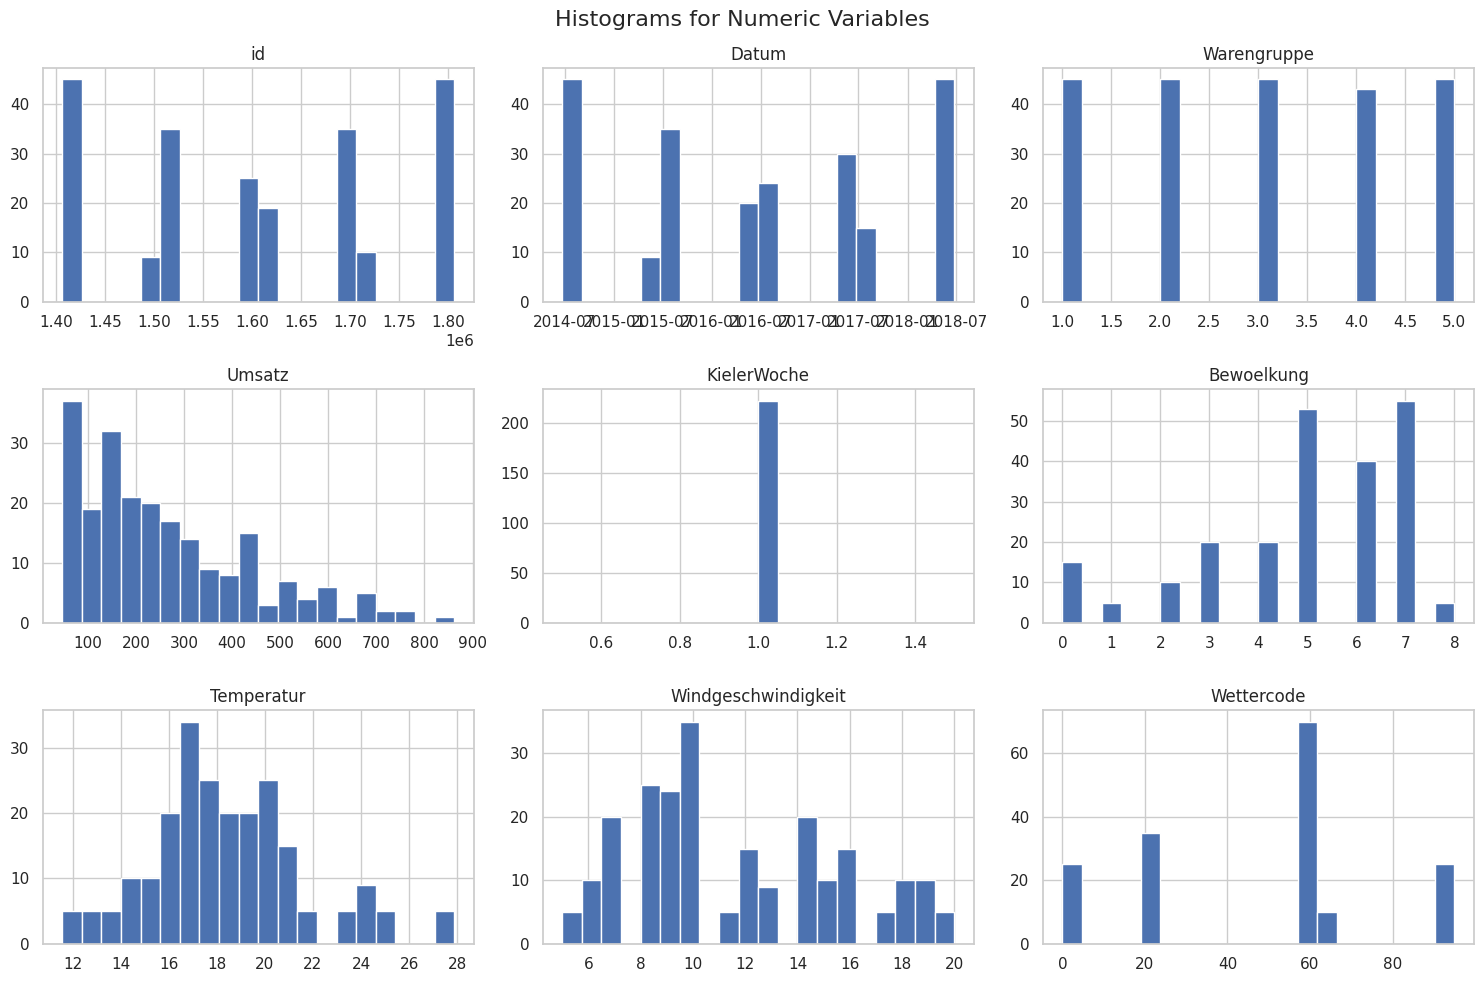

In [32]:
# Histograms for all numeric columns 
merged_df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms for Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()


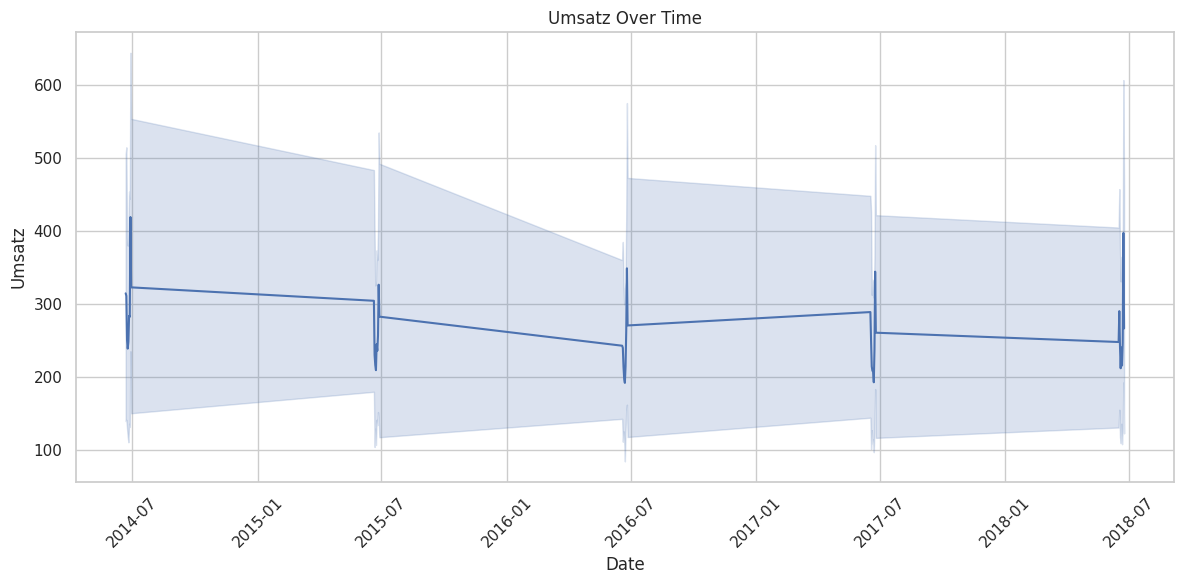

In [25]:
# Time Series Plot 
if 'Umsatz' in merged_df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=merged_df, x='Datum', y='Umsatz')
    plt.title('Umsatz Over Time')
    plt.ylabel('Umsatz')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


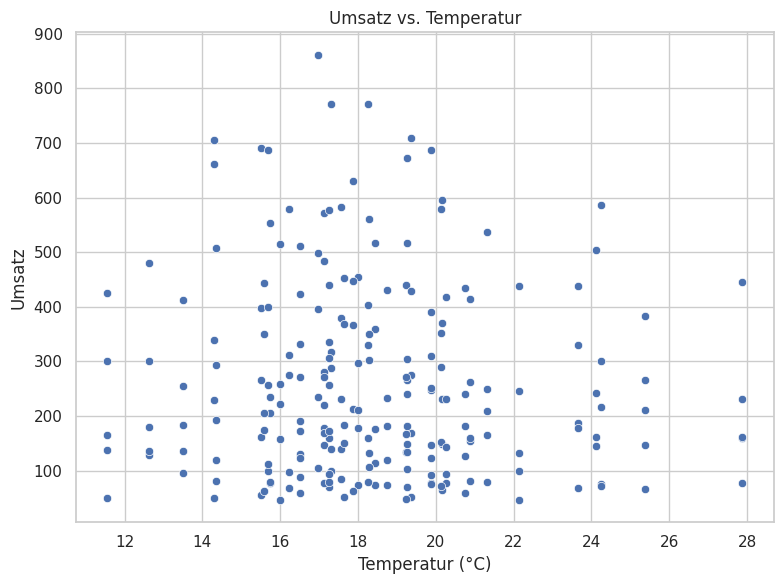

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='Temperatur', y='Umsatz')
plt.title('Umsatz vs. Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.tight_layout()
plt.show()


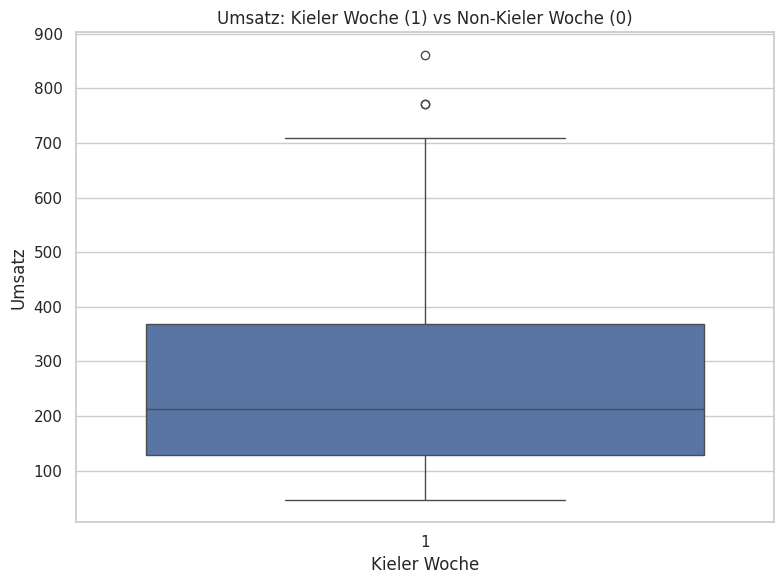

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='KielerWoche', y='Umsatz')
plt.title('Umsatz: Kieler Woche (1) vs Non-Kieler Woche (0)')
plt.xlabel('Kieler Woche')
plt.ylabel('Umsatz')
plt.tight_layout()
plt.show()


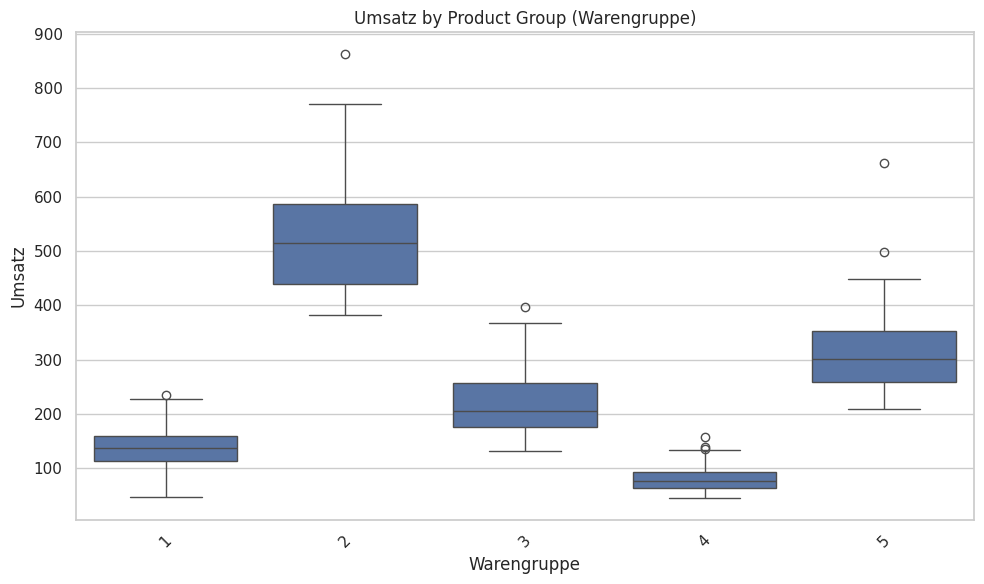

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Warengruppe', y='Umsatz')
plt.title('Umsatz by Product Group (Warengruppe)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


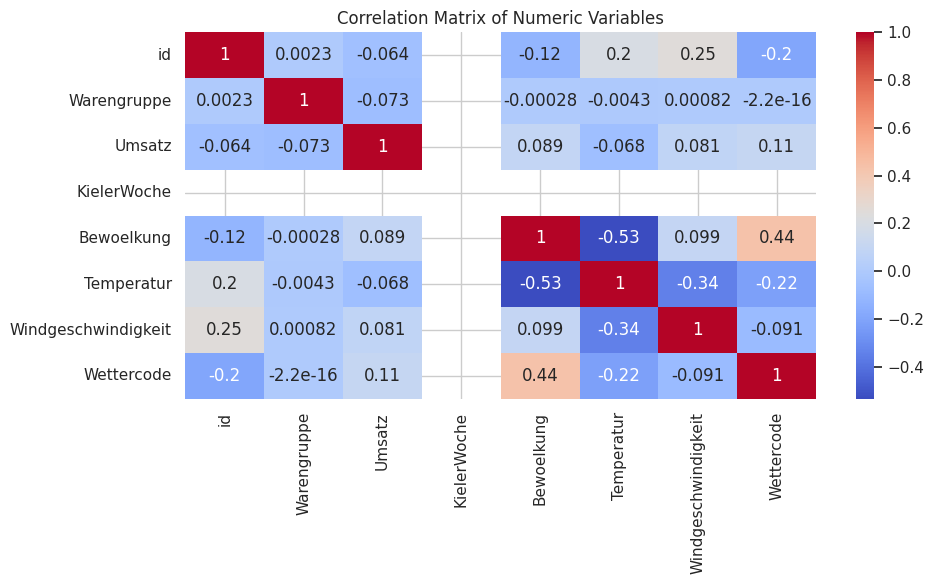

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()
